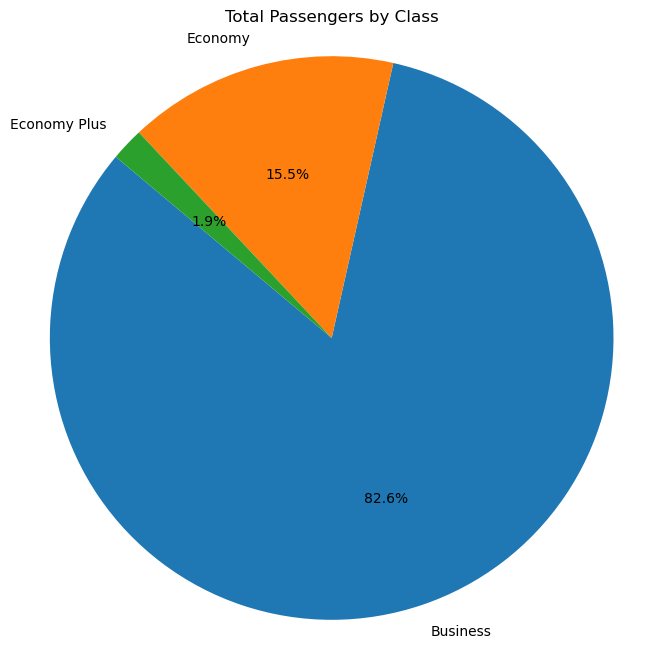

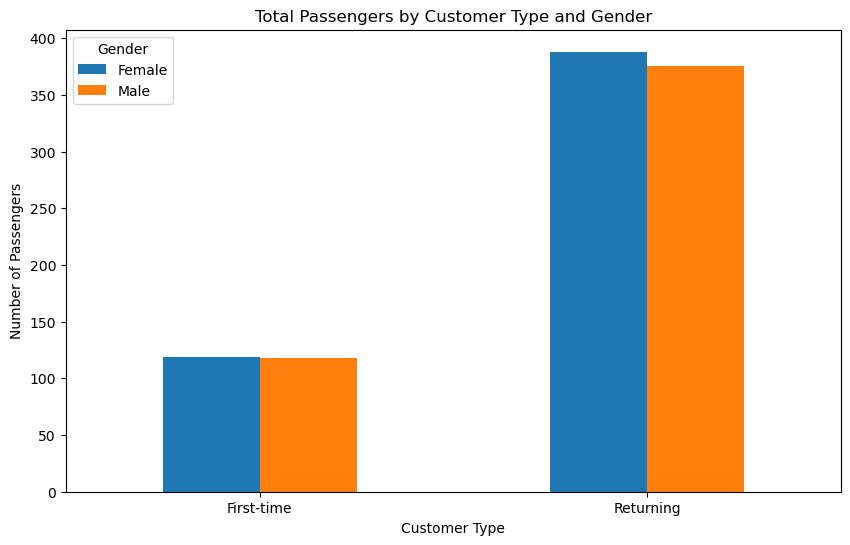

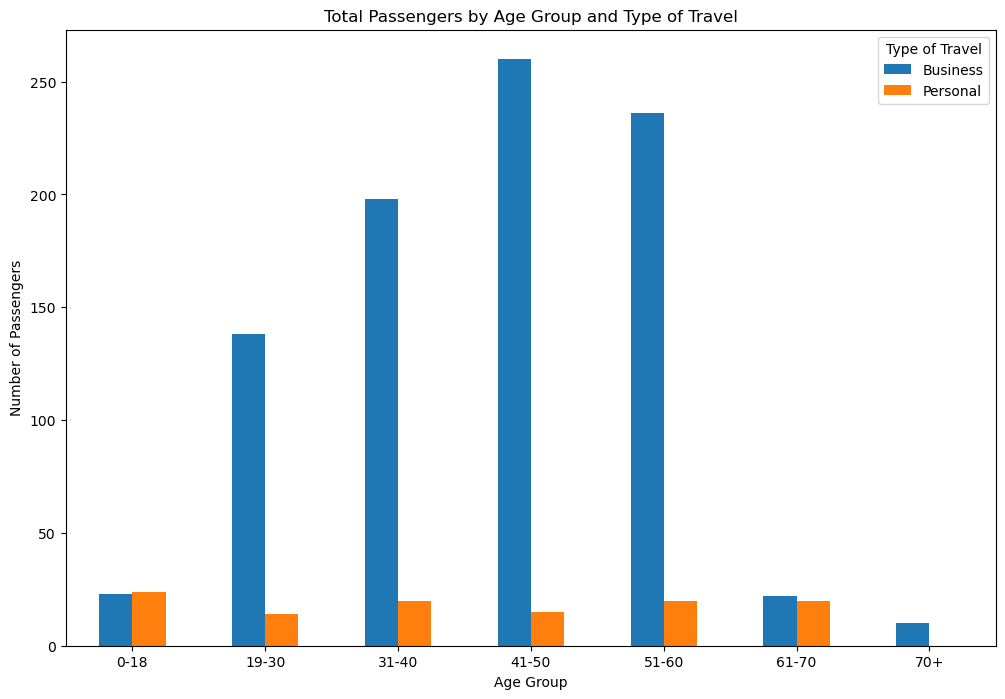

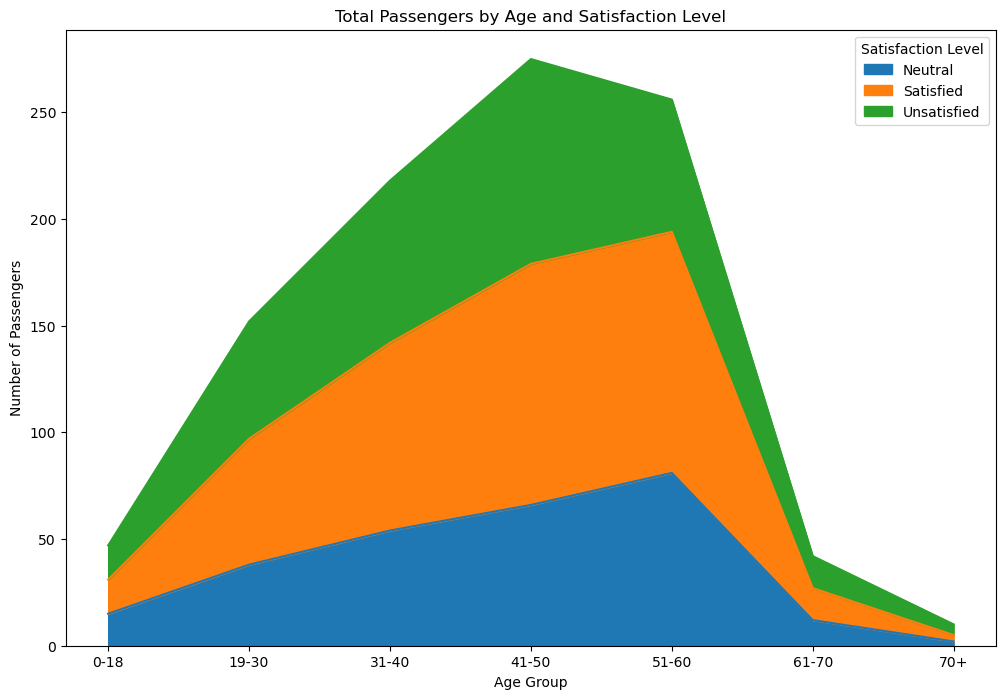

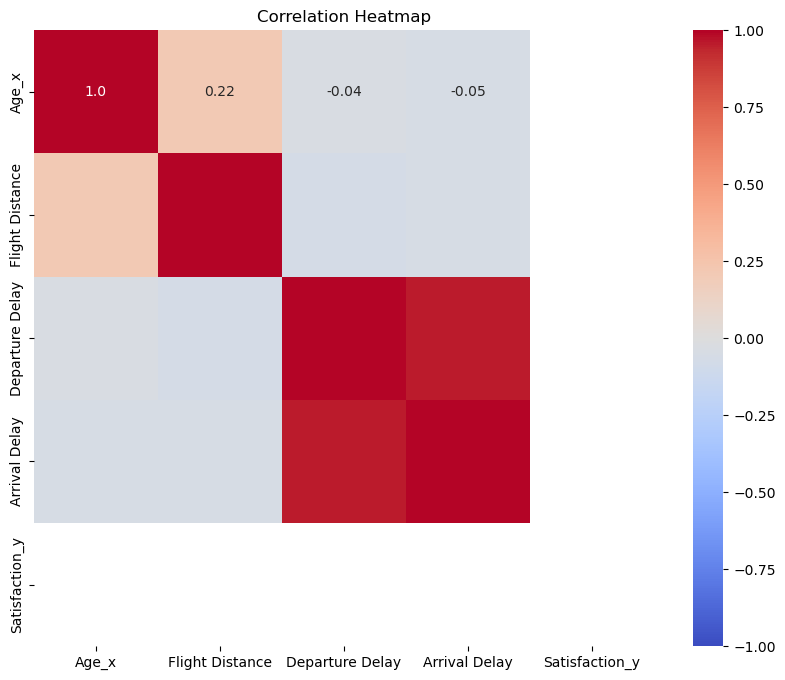

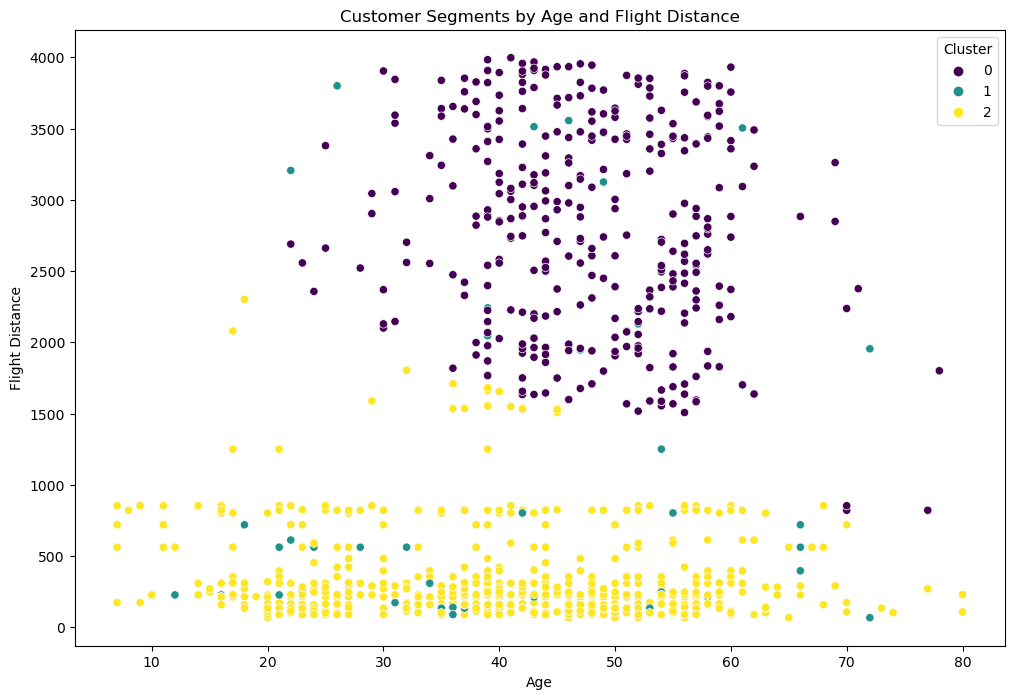

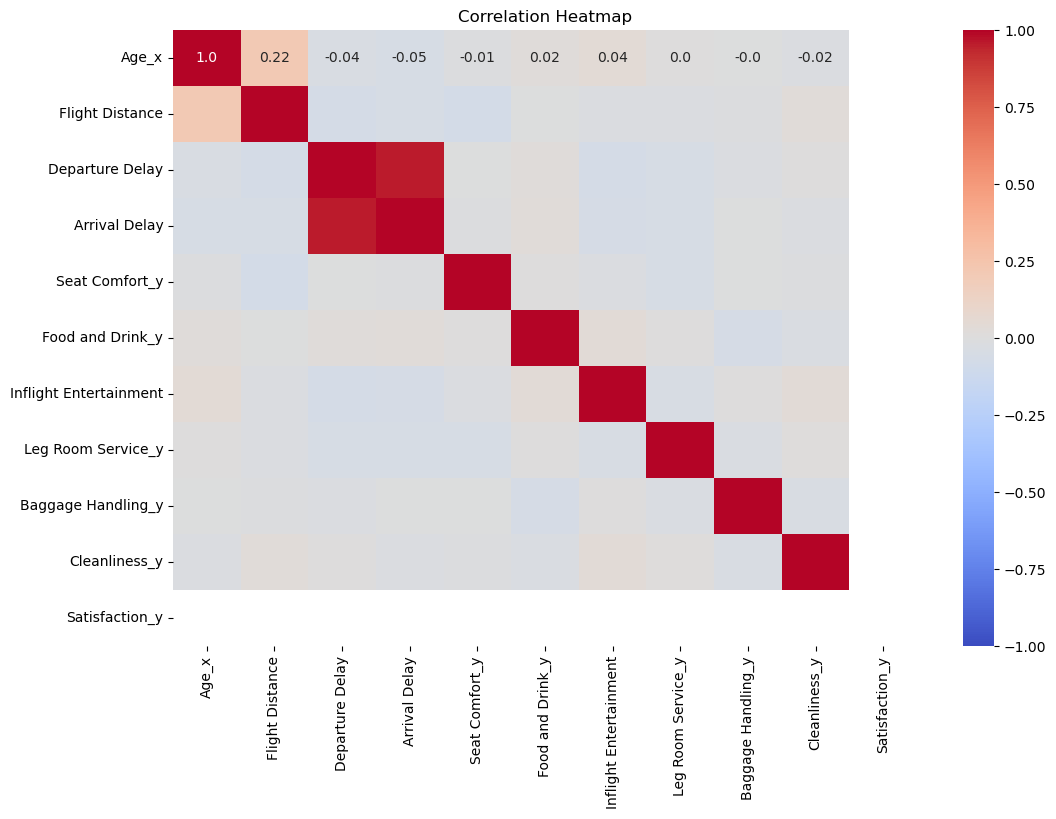

In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import sqlite3

dfaksdake
#Establish connection to database
conn = sqlite3.connect('airline_insights.db')
cursor = conn.cursor()

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Visualization 1: Pie Chart of Total Passengers by Class
class_distribution = data['Class'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Passengers by Class')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()
{
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "So Business Class has the highest percentage, which gives  "
   ]
  },
{
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "This bar chart of Total Passengers by Customer Type & Gender will help us answer these questions: What is the distribution of passengers by customer type and gender?, Are there more returning or first-time customers?, Is there a significant difference in gender for passengers? "
   ]
  },
# Visualization 2: Bar Chart of Total Passengers by Customer Type and Gender
customer_gender_distribution = data.groupby(['Customer Type', 'Gender_x']).size().unstack()

customer_gender_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Total Passengers by Customer Type and Gender')
plt.xlabel('Customer Type')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()
{
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "Great! This shows there is a signifcant difference in Returning customers, and slightly higher in Female Passengers. This would be a good opportunity to have targeted loyalty program here. Where as for First Time passengers, Females rank just slightly higher than Males. "
   ]
  },


# Create age groups
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']
data['Age Group'] = pd.cut(data['Age_x'], bins=bins, labels=labels)

# Visualization 3: Grouped Bar Chart of Total Passengers by Age Group and Type of Travel
age_travel_distribution = data.groupby(['Age Group', 'Type of Travel'], observed=False).size().unstack()

age_travel_distribution.plot(kind='bar', figsize=(12, 8))
plt.title('Total Passengers by Age Group and Type of Travel')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Type of Travel')
plt.xticks(rotation=0)
plt.show()

# Visualization 4: Stacked Area Chart of Total Passengers by Age and Satisfaction Level
age_satisfaction_distribution = data.groupby(['Age Group', 'Satisfaction_y'], observed=False).size().unstack()

age_satisfaction_distribution.plot(kind='area', figsize=(12, 8), stacked=True)
plt.title('Total Passengers by Age and Satisfaction Level')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.legend(title='Satisfaction Level')
plt.xticks(rotation=0)
plt.show()

# Visualization 5: Heatmap

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Select relevant columns for the heatmap
heatmap_data = data[['Age_x', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Satisfaction_y']].copy()

# Convert satisfaction to numeric for correlation
satisfaction_mapping = {'Neutral or Dissatisfied': 0, 'Satisfied': 1}
heatmap_data.loc[:, 'Satisfaction_y'] = heatmap_data['Satisfaction_y'].map(satisfaction_mapping)

# Calculate correlation matrix
correlation_matrix = heatmap_data.corr()

# Format annotations
formatted_corr = correlation_matrix.round(2).astype(str)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=formatted_corr, cmap='coolwarm', vmin=-1, vmax=1, fmt="")
plt.title('Correlation Heatmap')
plt.show()

# Visualzation 6: Customer Clustering

# Load the dataset
data = pd.read_csv('merged_data.csv')

# Select relevant columns for clustering
clustering_data = data[['Age_x', 'Flight Distance', 'Departure Delay', 'Arrival Delay']]

# Fill missing values with mean
clustering_data = clustering_data.fillna(clustering_data.mean())

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Perform K-means clustering with n_init set explicitly
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age_x', y='Flight Distance', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments by Age and Flight Distance')
plt.xlabel('Age')
plt.ylabel('Flight Distance')
plt.show()

#Feature Correlation Analysis  
# Load the dataset
data = pd.read_csv('merged_data.csv')

# Select relevant features and the target variable (Satisfaction)
features = ['Age_x', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
            'Seat Comfort_y', 'Food and Drink_y', 'Inflight Entertainment',
            'Leg Room Service_y', 'Baggage Handling_y', 'Cleanliness_y']
target = 'Satisfaction_y'

# Convert satisfaction to numeric for analysis
satisfaction_mapping = {'Neutral or Dissatisfied': 0, 'Satisfied': 1}
data[target] = data[target].map(satisfaction_mapping)

# Calculate the correlation matrix
correlation_matrix = data[features + [target]].corr()

# Format annotations for the heatmap
formatted_corr = correlation_matrix.round(2).astype(str)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=formatted_corr, cmap='coolwarm', vmin=-1, vmax=1, fmt="")
plt.title('Correlation Heatmap')
plt.show()
